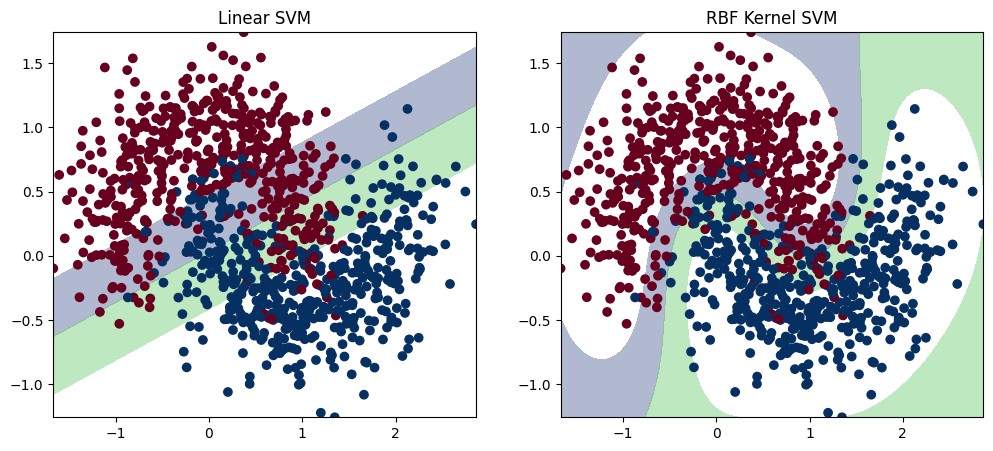

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X, y)

rbf_svc = SVC(kernel="rbf", gamma=1)
rbf_svc.fit(X, y)

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 100),
)

Z_linear = linear_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

Z_rbf = rbf_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, levels=[-1, 0, 1], alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.title("Linear SVM")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.title("RBF Kernel SVM")

plt.show()